In [4]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

**1 Построить гистограмму и с помощью описательной статистики охарактеризовать рассматриваемый бизнес-процесс.** 

Постройте гистограммы распределения цен для каждой категории (по количеству комнат). Какие выводы можно сделать на основе полученных гистограмм?

In [5]:
data = pd.read_csv('БД_Риэлтор.csv')
data.head()

,No,Rooms,DistMetro,Area,Price,Unnamed: 5,Unnamed: 6
0,1,3,12,56,9396,NaN,NaN
1,2,2,4,54,9785,NaN,NaN
2,3,1,2,31,5783,NaN,NaN
3,4,2,8,48,9123,NaN,NaN
4,5,1,11,31,5662,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          5000 non-null   int64  
 1   Rooms       5000 non-null   int64  
 2   DistMetro   5000 non-null   int64  
 3   Area        5000 non-null   int64  
 4   Price       5000 non-null   int64  
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(2), int64(5)
memory usage: 273.6 KB


In [7]:
data=data.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
data.head()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


In [61]:
data.describe()

,No,Rooms,DistMetro,Area,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.999200,9.588000,47.558800,8550.912200
std,1443.520003,0.813715,5.795151,17.167431,2985.530681
min,1.000000,1.000000,0.000000,21.000000,2825.000000
25%,1250.750000,1.000000,5.000000,31.000000,5904.750000
50%,2500.500000,2.000000,10.000000,48.000000,8407.500000
75%,3750.250000,3.000000,15.000000,59.000000,10652.000000
max,5000.000000,3.000000,19.000000,83.000000,17614.000000


In [8]:
data.mode().head(1)

,No,Rooms,DistMetro,Area,Price
0,1,2.0,16.0,29.0,5432.0


Text(0.5, 0, 'Цена на квартиры')

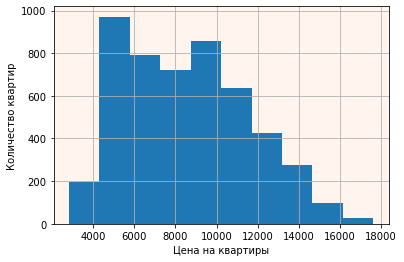

In [11]:
price=data['Price']
hist=price.hist()
hist.set_facecolor('seashell')
hist.set_ylabel('Количество квартир')
hist.set_xlabel('Цена на квартиры')

Цены на квартиры распределены равномерно. По описательной характеристике мы нашли самую часто встречающуюся цену на квартиры - 5432, максимальную - 17614 и минимальную - 2825.

In [14]:
price_room_1=price[data['Rooms']==1]
price_room_2=price[data['Rooms']==2]
price_room_3=price[data['Rooms']==3]

Text(0.5, 0, 'Цена однокомнатной квартиры')

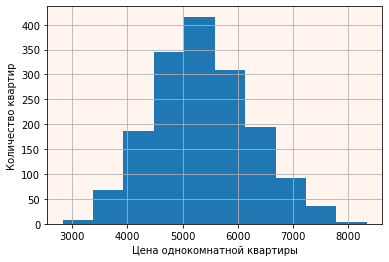

In [48]:
hist1=price_room_1.hist()
hist1.set_facecolor('seashell')
hist1.set_ylabel('Количество квартир')
hist1.set_xlabel('Цена однокомнатной квартиры')

Text(0.5, 0, 'Цена двухкомнатной квартиры')

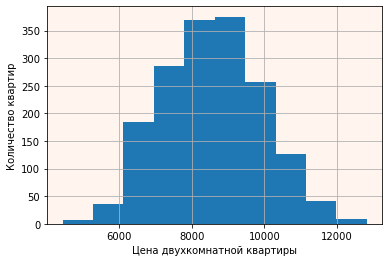

In [49]:
hist2=price_room_2.hist()
hist2.set_ylabel('Количество квартир')
hist2.set_facecolor('seashell')
hist2.set_xlabel('Цена двухкомнатной квартиры')

Text(0.5, 0, 'Цена трехкомнатной квартиры')

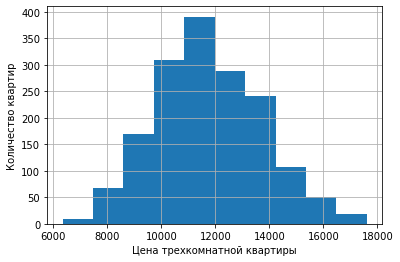

In [17]:
hist3=price_room_3.hist()
hist3.set_ylabel('Количество квартир')
hist3.set_xlabel('Цена трехкомнатной квартиры')

Вывод: из построенных гистограмм распределения цен по количеству комнат, можно выдвинуть гипотезу о нормальном распределении цен на квартиры с одинаковым количеством комнат.

**2 Оценить корреляцию**
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

Однокомнатные

In [18]:
room_1=data[data['Rooms']==1]
room_1[['Price', 'Area']].cov()

,Price,Area
Price,780506.330905,1989.519167
Area,1989.519167,11.899206


In [19]:
correlation_1=1989.519167/(statistics.pstdev(room_1['Price'])*statistics.pstdev(room_1['Area']))
print(correlation_1)
print(correlation_1*100)

0.6532254508775661
65.32254508775661


In [20]:
room_1[['Price', 'Area']].corr()

,Price,Area
Price,1.000000,0.652831
Area,0.652831,1.000000


Коэффициент корреляции Пирсона = 0.65

Двухкомнатные

In [50]:
room_2=data[data['Rooms']==2]
room_2[['Price', 'Area']].corr()

,Price,Area
Price,1.000000,0.705816
Area,0.705816,1.000000


In [22]:
correlation_2=5793.161991/(statistics.pstdev(room_2['Price'])*statistics.pstdev(room_2['Area']))
print(correlation_2)
print(correlation_2*100)

0.706233412640702
70.6233412640702


In [23]:
room_2[['Price', 'Area']].corr()

,Price,Area
Price,1.000000,0.705816
Area,0.705816,1.000000


Коэффициент корреляции Пирсона = 0.71

Трехкомнатные

In [24]:
room_3=data[data['Rooms']==3]
room_3[['Price', 'Area']].cov()

,Price,Area
Price,3.840079e+06,13052.97479
Area,1.305297e+04,79.99979


In [25]:
correlation_3=13052.97479/(statistics.pstdev(room_3['Price'])*statistics.pstdev(room_3['Area']))
print(correlation_3)
print(correlation_3*100)

0.7451742210435901
74.51742210435901


In [26]:
room_3[['Price', 'Area']].corr()

,Price,Area
Price,1.000000,0.744723
Area,0.744723,1.000000


Коэффициент корреляции Пирсона = 0.74 

Корреляция для каждой категории квартир показывает,что существует связь цены и количества комнат в квартире. Чем больше комнат в квартире, тем выше его цена.

**3 Рассчитать**
Рассчитайте границы квартилей распределения цен на 2-х квартиры площадью более 40 кв. метров.**

In [27]:
room_2_more_40=room_2[room_2['Area']>40]
room_2_more_40

,No,Rooms,DistMetro,Area,Price
1,2,2,4,54,9785
3,4,2,8,48,9123
7,8,2,12,52,7908
9,10,2,5,46,8047
15,16,2,0,49,10305
...,...,...,...,...,...
4989,4990,2,6,49,9646
4992,4993,2,19,43,9181
4994,4995,2,18,59,11192
4995,4996,2,0,52,8455


In [28]:
room_2_more_40.quantile([.25, .50, .75], axis = 0) 

,No,Rooms,DistMetro,Area,Price
0.25,1253.50,2.0,5.0,45.0,7924.0
0.50,2473.00,2.0,9.0,49.0,8812.0
0.75,3730.75,2.0,14.0,53.0,9684.5


In [29]:
print('Первый квантиль: ', room_2_more_40['Price'].min(),', ', np.quantile(room_2_more_40['Price'], .25) )
print('Второй квантиль: ', np.quantile(room_2_more_40['Price'], .25),', ', np.quantile(room_2_more_40['Price'], .50) )
print('Третий квантиль: ', np.quantile(room_2_more_40['Price'], .50),', ', np.quantile(room_2_more_40['Price'], .75) )
print('Четвертый квантиль: ', np.quantile(room_2_more_40['Price'], .75),', ', room_2_more_40['Price'].max() )

Первый квантиль:  4427 ,  7924.0
Второй квантиль:  7924.0 ,  8812.0
Третий квантиль:  8812.0 ,  9684.5
Четвертый квантиль:  9684.5 ,  12833


**4 Решить задачу**
Вы являетесь риэлтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.
В каждой категории разная степень корреляции. т.е. у 3 комнатных она может быть иная, чем у однокомнатных.


In [53]:
room3 = price[data['Rooms'] == 3]

N = room3.count()
print('Количество: ', N)
print('Средняя цена: ', round(room3.mean(), 3))


Количество:  1653
Средняя цена:  11749.978


In [62]:
pr = round(9200/0.03, 3)
print(pr)
print(pr/25)


306666.667
12266.66668


In [63]:
count = room3[data['Price'] >= 12266].count()
count 

616

In [66]:
V = round (count/N, 3)
print('Вероятность: ', V*100, '%')

Вероятность:  37.3 %
